Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [3]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('C:/Users/charm/Music/Multiple Disease Prediction System/Multiple Disease Prediction System/dataset/diabetes.csv') 

In [4]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [6]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [10]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0              6      148             72             35        0  33.6  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


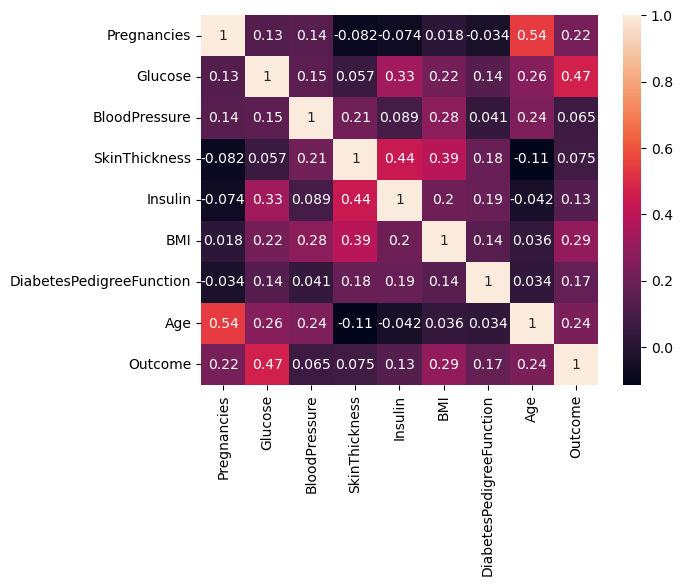

In [12]:
sns.heatmap(diabetes_dataset.corr(),annot=True)
plt.show()

Train Test Split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [15]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
619,0,119,0,0,0,32.4,0.141,24
329,6,105,70,32,68,30.8,0.122,37
13,1,189,60,23,846,30.1,0.398,59
476,2,105,80,45,191,33.7,0.711,29
45,0,180,66,39,0,42.0,1.893,25
...,...,...,...,...,...,...,...,...
303,5,115,98,0,0,52.9,0.209,28
592,3,132,80,0,0,34.4,0.402,44
559,11,85,74,0,0,30.1,0.300,35
725,4,112,78,40,0,39.4,0.236,38


In [16]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
615,3,106,72,0,0,25.8,0.207,27
80,3,113,44,13,0,22.4,0.140,22
148,5,147,78,0,0,33.7,0.218,65
132,3,170,64,37,225,34.5,0.356,30
501,3,84,72,32,0,37.2,0.267,28
...,...,...,...,...,...,...,...,...
127,1,118,58,36,94,33.3,0.261,23
185,7,194,68,28,0,35.9,0.745,41
85,2,110,74,29,125,32.4,0.698,27
497,2,81,72,15,76,30.1,0.547,25


In [17]:
Y_train

619    1
329    0
13     1
476    1
45     1
      ..
303    1
592    1
559    0
725    0
253    0
Name: Outcome, Length: 614, dtype: int64

In [18]:
Y_test

615    0
80     0
148    0
132    1
501    0
      ..
127    0
185    1
85     0
497    0
86     0
Name: Outcome, Length: 154, dtype: int64

Training the Model

# SVM

In [19]:
classifier = svm.SVC(kernel='linear')

In [20]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [21]:
accuracy=classifier.score(X_test,Y_test)
accuracy

0.7727272727272727

Model Evaluation

Accuracy Score

In [24]:
# accuracy score on the training data
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)

In [25]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [26]:
# accuracy score on the test data
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

In [27]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
accuracy=classifier.score(X_test,Y_test)
accuracy

0.7727272727272727

In [30]:
X_test_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

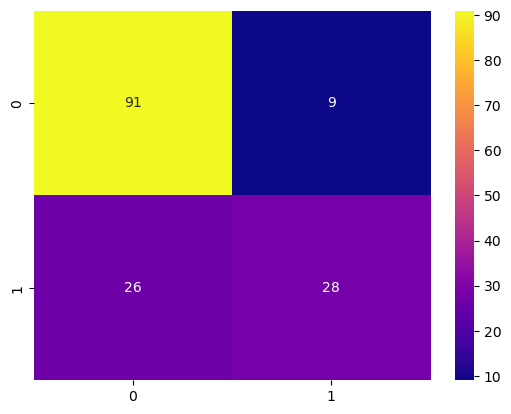

In [31]:
cnf_matrix=confusion_matrix(Y_test,X_test_pred)
labels=[0,1]
sns.heatmap(cnf_matrix,annot=True,cmap="plasma",xticklabels=labels,yticklabels=labels)
plt.show()

In [32]:
from sklearn.metrics import classification_report

In [34]:
print("\n classification report: \n {}|" . format(classification_report(Y_test,X_test_pred)))


 classification report: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154
|


# Decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model=DecisionTreeClassifier(max_depth=500,random_state=300)

In [24]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=500, random_state=300)

In [25]:
accuracy=model.score(X_test,Y_test)
accuracy

0.6883116883116883

In [40]:
y_pret=model.predict(X_test)

In [41]:
from sklearn import metrics

In [42]:
accuracy=model.score(X_test,Y_test)
accuracy

0.6883116883116883

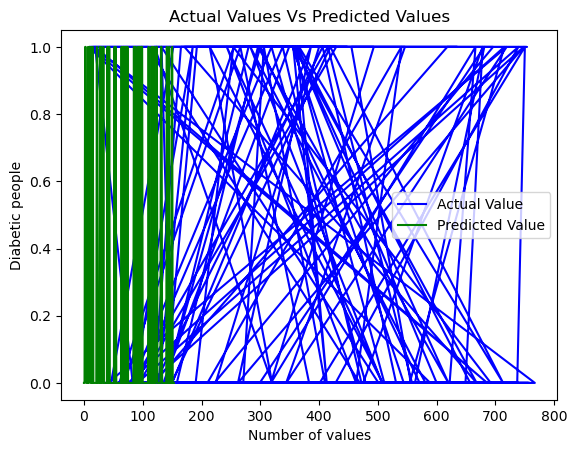

In [31]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(X_test_prediction,color='green',label='Predicted Value')
plt.title('Actual Values Vs Predicted Values')
plt.xlabel('Number of values')
plt.ylabel('Diabetic people')
plt.legend()
plt.show()

# Making a Prediction for System

In [21]:
input_data = (3,170,65,15,160,24.6,0.567,50)
import warnings
warnings.simplefilter("ignore")
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
